In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import numpy as np

In [3]:
url = 'https://raw.githubusercontent.com/Jneny/Hospitalcapacity/main/Data/icu_beds.csv'
data = read_csv(url, header=0, parse_dates=[0], index_col=0)
data = data.asfreq('d')
adultcrit = pd.DataFrame(data, columns=['adult_icu_crci_patients'])
sadultcrit = pd.Series(adultcrit.adult_icu_crci_patients)

In [4]:
size = 627
adtrain = adultcrit.iloc[:size]
adtest = adultcrit.iloc[size:]

In [5]:
adtest.head()

,adult_icu_crci_patients
date,
2022-01-18,572
2022-01-19,580
2022-01-20,583
2022-01-21,577
2022-01-22,591


In [6]:
model_whole = sm.tsa.ARIMA(adtrain, order = (1,1,1))
result_whole = model_whole.fit()

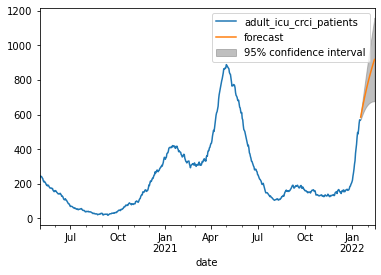

In [7]:
fig, ax = plt.subplots()
ax = adtrain.loc['2020-05-02':].plot(ax=ax)
fig = result_whole.plot_predict(start = '2022-01-18', end = "2022-02-14", dynamic=True, ax=ax, plot_insample=False)
plt.show()

In [17]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

In [18]:
# calculate root mean squared error
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

In [12]:
# calculate mean absolute percentage error MAPE
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [14]:
predictions1 = result_whole.predict(start = '2022-01-18', end = "2022-02-14")
rmse1= math.sqrt(mean_squared_error(adtest['adult_icu_crci_patients'], predictions1))
print(rmse1)
mape1 = mape(adtest['adult_icu_crci_patients'], predictions1)
print(mape1)

521.1389889116537
97.64018102285735


In [20]:
print(f'Mean Absolute Error = {mean_absolute_error(adtest,predictions1)}')
print(f'Mean Squared Error = {mean_squared_error(adtest,predictions1)}')

Mean Absolute Error = 516.4982492979533
Mean Squared Error = 271585.8457638606
